Wine Quality Analysis

reference:https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434

In [3]:
#Importing functions
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px


In [4]:
#Reading data
df =pd.read_csv('/home/lavender/Downloads/winequality-red.csv')

In [5]:
#Understanding data
df.shape

(1599, 12)

In [6]:
print("rows,columns" +str(df.shape))
df.head()  #first five rows of dataset

rows,columns(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
#the data looks very clean but we will still make sure there are no missing values
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [8]:
#no missing values, so we will check for duplicated data
extra = df[df.duplicated()]
extra.shape


(240, 12)

In [20]:
fig = px.histogram(df, x='quality')
fig.show()

In [21]:
fig1 = plt.

SyntaxError: invalid syntax (<ipython-input-21-65354eaa4998>, line 1)

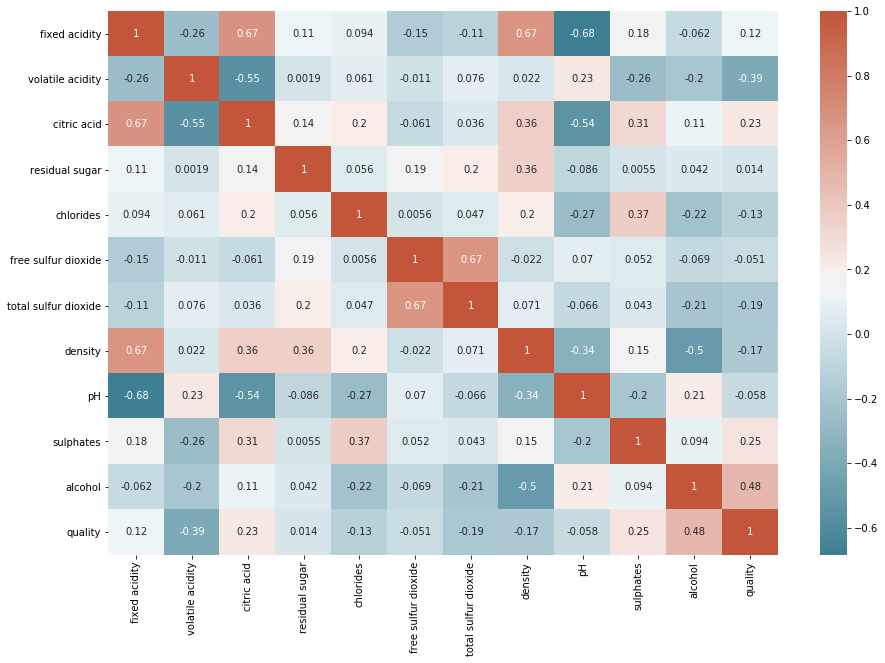

In [9]:
corr = df.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [12]:
print(df['goodquality'])

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       1
8       1
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      1
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1569    0
1570    0
1571    0
1572    0
1573    0
1574    0
1575    0
1576    0
1577    0
1578    0
1579    0
1580    0
1581    0
1582    0
1583    0
1584    1
1585    0
1586    0
1587    0
1588    0
1589    0
1590    0
1591    0
1592    0
1593    0
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64


In [13]:
#proportion of good quality vs bad quality wine counts
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [15]:
#standarding and scaling of feature variable
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)



In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

#when random_state set to an integer, train_test_split will return same results for each execution. when random_state set to None, train_test_split will return different results for each execution

In [17]:
#1.Desion Tree.Advantages: Easy to build and fast, Limitation: Accuracy
from sklearn.metrics import classification_report #to display the report of after the tree runs
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state = 1) #random_state =1 will return same result for each execution
model1.fit(X_train,y_train)

y_pred1 = model1.predict(X_test)

print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       355
           1       0.53      0.73      0.62        45

   micro avg       0.90      0.90      0.90       400
   macro avg       0.75      0.83      0.78       400
weighted avg       0.92      0.90      0.90       400



In [18]:
#Random Forest, builds on multiple decision trees and selects the best result, Low risk of error
from sklearn.ensemble import RandomForestClassifier #Ensemble Algoruthms-Combine multiple algorithms to make a strong one
model2 = RandomForestClassifier(random_state = 1)
model2.fit(X_train,y_train)

y_pred2 = model2.predict(X_test)
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.94      0.97      0.95       355
           1       0.67      0.53      0.59        45

   micro avg       0.92      0.92      0.92       400
   macro avg       0.80      0.75      0.77       400
weighted avg       0.91      0.92      0.91       400



/home/lavender/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [19]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier #built from decision trees for binary classification
models = AdaBoostClassifier(random_state = 1)
models.fit(X_train,y_train)

ya_pred = models.predict(X_test)

print(classification_report(y_test,ya_pred))



              precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

   micro avg       0.89      0.89      0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400



In [20]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

y3_pred = svc_model.predict(X_test)



/home/lavender/.virtualenvs/cv/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



checking the accuracy of our model by comparing it to the value we already have y_pred3 using confusion matrix
Confusion matrix gives us the report of false negatives versus true negatives and vice versa


In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y3_pred)


In [38]:
cm = np.array(confusion_matrix(y_test, y3_pred, labels = [1,0]))
confusion = pd.DataFrame(cm, index = ['is_goodquality','is_badquality'], columns =['predicted_good','predicted_bad'] )

In [39]:
print(confusion)

                predicted_good  predicted_bad
is_goodquality              16             29
is_badquality                6            349
